In [24]:
#California housing

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from operator import itemgetter
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  #default='warn'

In [26]:
df = pd.read_csv('California_Houses.csv')

In [27]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [28]:
df.isnull().values.any()

False

In [29]:
print(df.columns.values)

['Median_House_Value' 'Median_Income' 'Median_Age' 'Tot_Rooms'
 'Tot_Bedrooms' 'Population' 'Households' 'Latitude' 'Longitude'
 'Distance_to_coast' 'Distance_to_LA' 'Distance_to_SanDiego'
 'Distance_to_SanJose' 'Distance_to_SanFrancisco']


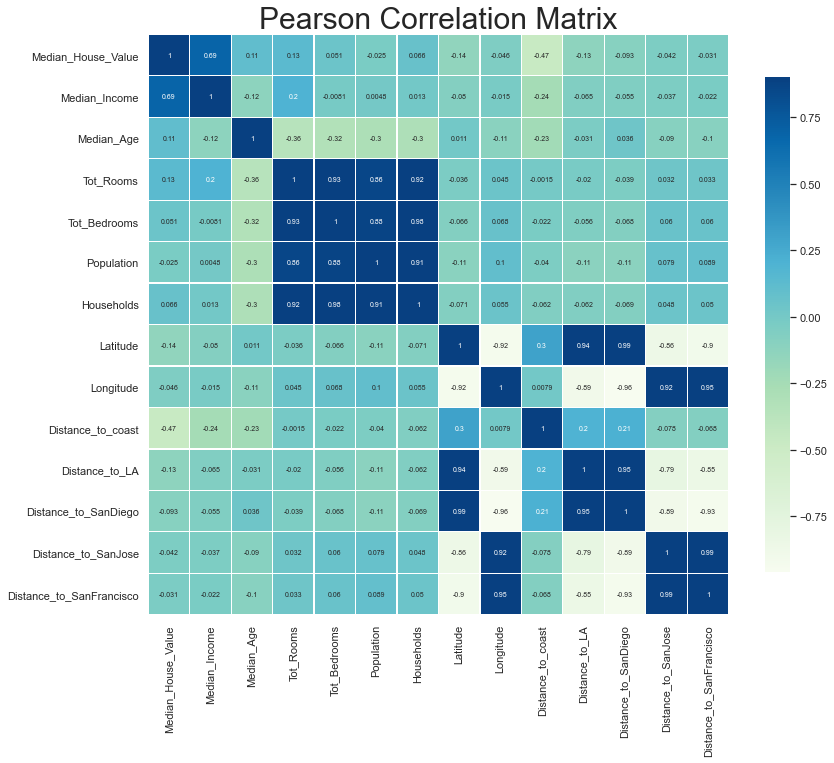

In [30]:
sns.set(style = "whitegrid", font_scale = 1)

plt.figure(figsize = (13, 13))
plt.title('Pearson Correlation Matrix',fontsize = 30)
sns.heatmap(df.corr(), linewidths = 0.3, vmax = 0.9, square = True, cmap = "GnBu", linecolor = 'w',
            annot = True, annot_kws = {"size":7}, cbar_kws = {"shrink": .7})
plt.show()

In [31]:
X = df.drop('Median_House_Value', axis = 1)
y = df['Median_House_Value']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 99)

In [32]:
print('The shape of the training data is: ',X_train.shape)
print('The shape of the test data is: ',X_test.shape)

The shape of the training data is:  (15480, 13)
The shape of the test data is:  (5160, 13)


In [33]:
numFeat = ['Median_Income', 'Median_Age', 'Tot_Rooms',
            'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
            'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
            'Distance_to_SanJose', 'Distance_to_SanFrancisco']

ScalerVariable = MinMaxScaler()

X_train[numFeat] = ScalerVariable.fit_transform(X_train[numFeat])
X_test[numFeat] = ScalerVariable.transform(X_test[numFeat])

In [34]:
print('Max: ',X_train.max() ,"\n")
print('Min: ', X_train.min())

Max:  Median_Income               1.0
Median_Age                  1.0
Tot_Rooms                   1.0
Tot_Bedrooms                1.0
Population                  1.0
Households                  1.0
Latitude                    1.0
Longitude                   1.0
Distance_to_coast           1.0
Distance_to_LA              1.0
Distance_to_SanDiego        1.0
Distance_to_SanJose         1.0
Distance_to_SanFrancisco    1.0
dtype: float64 

Min:  Median_Income               0.0
Median_Age                  0.0
Tot_Rooms                   0.0
Tot_Bedrooms                0.0
Population                  0.0
Households                  0.0
Latitude                    0.0
Longitude                   0.0
Distance_to_coast           0.0
Distance_to_LA              0.0
Distance_to_SanDiego        0.0
Distance_to_SanJose         0.0
Distance_to_SanFrancisco    0.0
dtype: float64


In [35]:
price_correlation = df.corr()['Median_House_Value'].sort_values(ascending = False)
print('Features with strongest correlation to price: ', price_correlation[:14])

Features with strongest correlation to price:  Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64


In [36]:
price_correlation = df.corr()['Median_House_Value'].sort_values(ascending=False).abs()
print('Features with strongest correlation to price:\n', price_correlation[:11])

Features with strongest correlation to price:
 Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                  0.024650
Distance_to_SanFrancisco    0.030559
Distance_to_SanJose         0.041590
Longitude                   0.045967
Distance_to_SanDiego        0.092510
Name: Median_House_Value, dtype: float64


In [37]:
#Linear Regression Model
linReg = LinearRegression().fit(X_train, y_train)
print("Linear regression: Training accuracy is:  ", round(linReg.score(X_train, y_train),(4)))
print("Linear regression: Test accuracy is:        ", round(linReg.score(X_test, y_test),(4)))

cross_scores = cross_val_score(LinearRegression(), X_train, y_train, cv = 5)
print('Mean cross-validation accuracy: {:.4f}'.format(np.mean(cross_scores)))

Linear regression: Training accuracy is:   0.6454
Linear regression: Test accuracy is:         0.6497
Mean cross-validation accuracy: 0.6425


In [38]:
print('The shape of our dataframe, not including our target column which is price is:',X.shape)

bestK = SelectKBest(f_regression, k = 5)
bestK.fit(X_train, y_train)
X_train_bestK = bestK.transform(X_train)
X_test_bestK = bestK.transform(X_test)

print('The shape of the best features is: ',X_train_bestK.shape)
print(X.columns[bestK.get_support()])

best_features = X.columns[bestK.get_support()]

The shape of our dataframe, not including our target column which is price is: (20640, 13)
The shape of the best features is:  (15480, 5)
Index(['Median_Income', 'Tot_Rooms', 'Latitude', 'Distance_to_coast',
       'Distance_to_LA'],
      dtype='object')


In [39]:
#kNN Regression Model
paramGridKnn = {'n_neighbors': np.arange(1, 20)}
gridKnn = GridSearchCV(KNeighborsRegressor(), paramGridKnn, cv = 5)

gridKnn.fit(X_train, y_train)
print('Best cross-validation score: {}'.format(gridKnn.best_score_))
print('Best parameters:', gridKnn.best_params_)

print('Grid Knn-train score: ', gridKnn.score(X_train, y_train))
print('Grid Knn-test score: ',gridKnn.score(X_test, y_test))

Best cross-validation score: 0.7358345355639597
Best parameters: {'n_neighbors': 8}
Grid Knn-train score:  0.8014151602700561
Grid Knn-test score:  0.7468463889812955


In [40]:
#Knn-best features
#Examining if accuracy can be improved by only using the 10 best features, within the range of 1-20 neigbours.
#Also, finding which paramter yield the best accuracy, once again using GridSearchCV. 
#Took 32 seconds to run
paramGridKnn1 = {'n_neighbors': np.arange(1, 20)}
gridKnn1 = GridSearchCV(KNeighborsRegressor(), paramGridKnn1, cv = 5)

gridKnn1.fit(X_train_bestK, y_train)
print('Best cross-validation score: {}'.format(gridKnn1.best_score_))
print('Best parameters:', gridKnn1.best_params_)

print('Grid Knn-train score: ', gridKnn1.score(X_train_bestK, y_train))
print('Grid Knn-test score: ',gridKnn1.score(X_test_bestK, y_test))

Best cross-validation score: 0.7311636328279815
Best parameters: {'n_neighbors': 10}
Grid Knn-train score:  0.7876774751532651
Grid Knn-test score:  0.7441034490473688


In [41]:
#Random Forest Model
numTrees = [50, 100, 150]
numMaxFeatures = [5, 10, 13]
maxLevelDepth = [2, 4, 8, 10]
maxLevelDepth.append(None)
minSamplesSplit = [2, 4]
minNumSamplesLeaf = [1, 3]

randomGrid = {'n_estimators': numTrees,
               'max_features': numMaxFeatures,
               'max_depth': maxLevelDepth,
               'min_samples_split': minSamplesSplit,
               'min_samples_leaf': minNumSamplesLeaf}

randomSearch = RandomizedSearchCV(RandomForestRegressor(), param_distributions = randomGrid, n_iter = 10, cv = 3, random_state = 99)

randomSearch.fit(X_train, y_train)

print('RandomForest search cross validation score is: ', randomSearch.best_score_)
print('RandomForest search best parameters: ',randomSearch.best_params_)
print('RandomForest search test score: ',randomSearch.score(X_test, y_test))

RandomForest search cross validation score is:  0.8370979782427428
RandomForest search best parameters:  {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 5, 'max_depth': None}
RandomForest search test score:  0.8487836238135164


In [42]:
#Train score for Random forest model
print('The best train score for Random forest is: ',randomSearch.score(X_train, y_train))

#Finding the features that the random forest model predicts as the best ones.
featureImportances = list(zip(randomSearch.best_estimator_.feature_importances_, X_train.columns))
sortedFeatureImportances = sorted(featureImportances, key = itemgetter(0), reverse = True)

five_best_rfr = sortedFeatureImportances[0:5]

for feature in five_best_rfr:
    print(feature)

The best train score for Random forest is:  0.9449886967248912
(0.3952267062849436, 'Median_Income')
(0.20059780871705865, 'Distance_to_coast')
(0.06495318676589862, 'Latitude')
(0.06106241973525922, 'Distance_to_SanJose')
(0.06076705863503449, 'Distance_to_SanFrancisco')
